In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from scipy.signal import convolve2d
import time

In [17]:
# Load and normalize Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
kernels = {
    'Edge Detection': np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]]),

    'Vertical Lines': np.array([[-1,  0,  1],
                                [-1,  0,  1],
                                [-1,  0,  1]]),

    'Blur': np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]]) / 9 
}

In [19]:
def apply_convolution(image, kernel):
    return convolve2d(image, kernel, mode='same')

In [20]:
# Visualize feature maps for a sample
def show_feature_maps(digit_idx=None):
    if digit_idx is None:
        digit_idx = np.random.randint(0, len(X_train))

    image = X_train[digit_idx].squeeze()  # Remove channel for visualization
    digit = np.argmax(y_train[digit_idx])

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle(f'CNN Feature Detection - MNIST Digit: {digit}', fontsize=16)

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    for idx, (name, kernel) in enumerate(kernels.items(), 1):
        axes[0, idx].imshow(kernel, cmap='coolwarm')
        axes[0, idx].set_title(f'Kernel: {name}')
        axes[0, idx].axis('off')

        result = apply_convolution(image, kernel)
        result = (result - result.min()) / (result.max() - result.min())

        axes[1, idx].imshow(result, cmap='gray')
        axes[1, idx].set_title(f'Feature Map')
        axes[1, idx].axis('off')

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

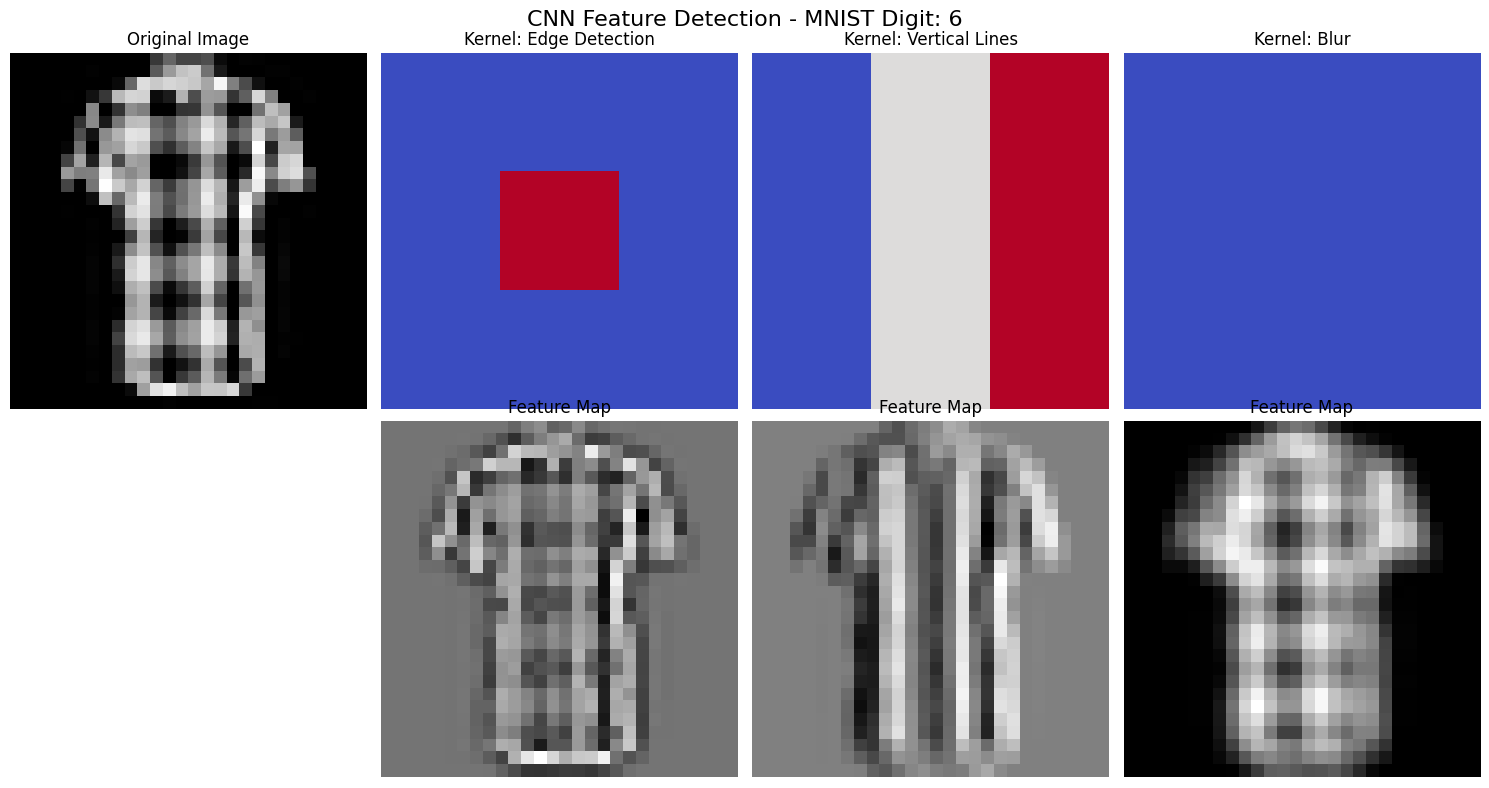

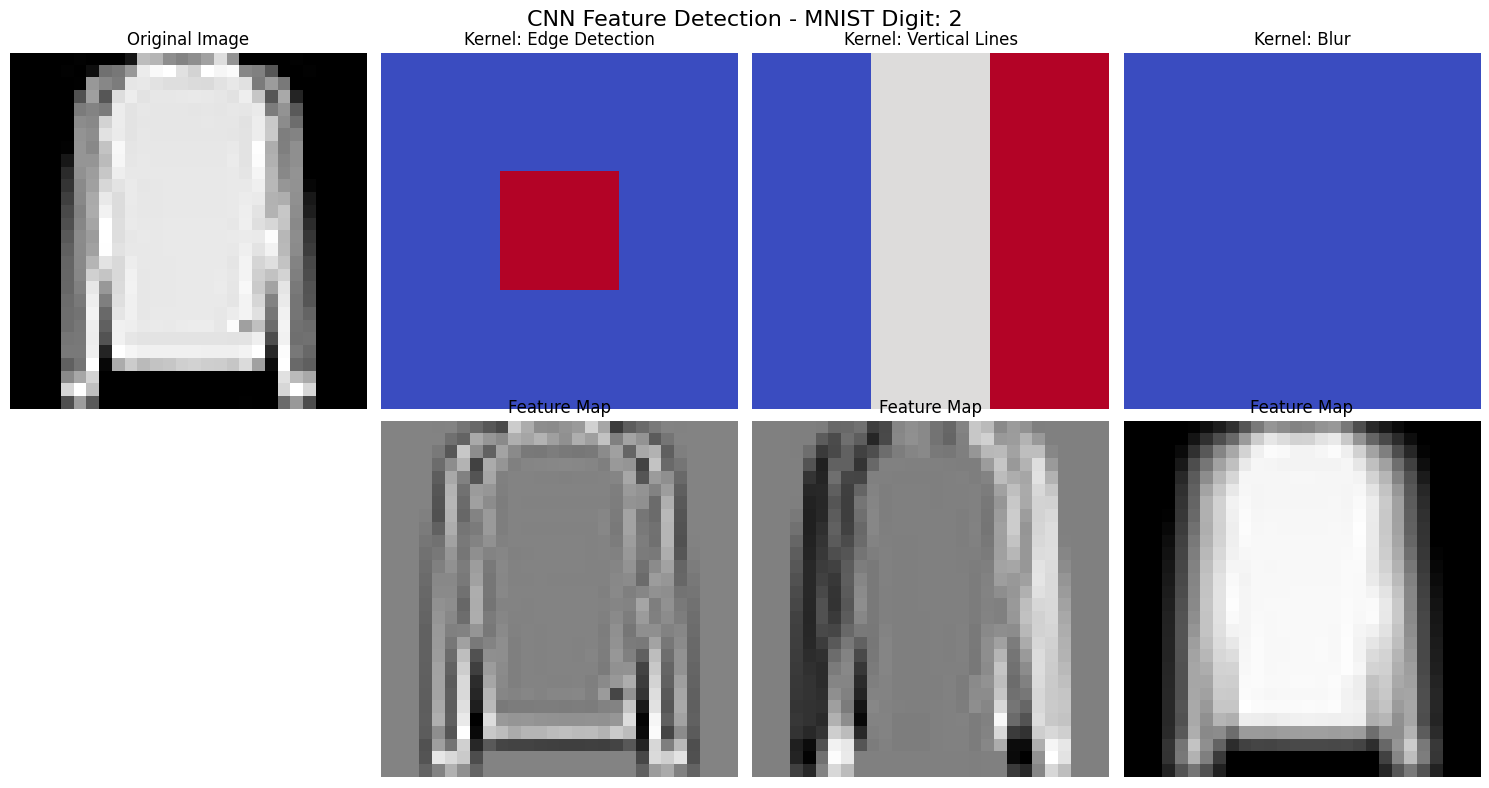

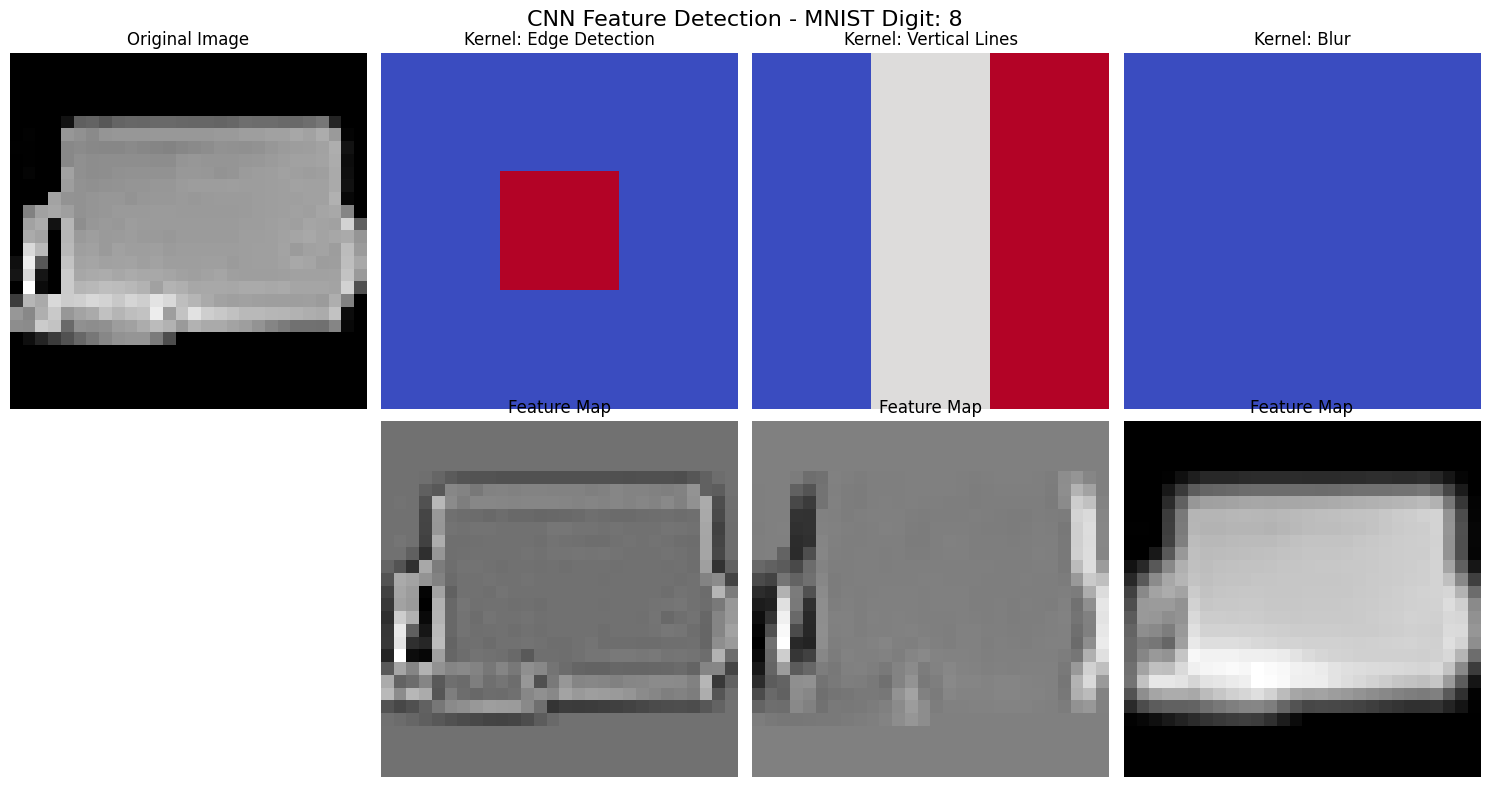

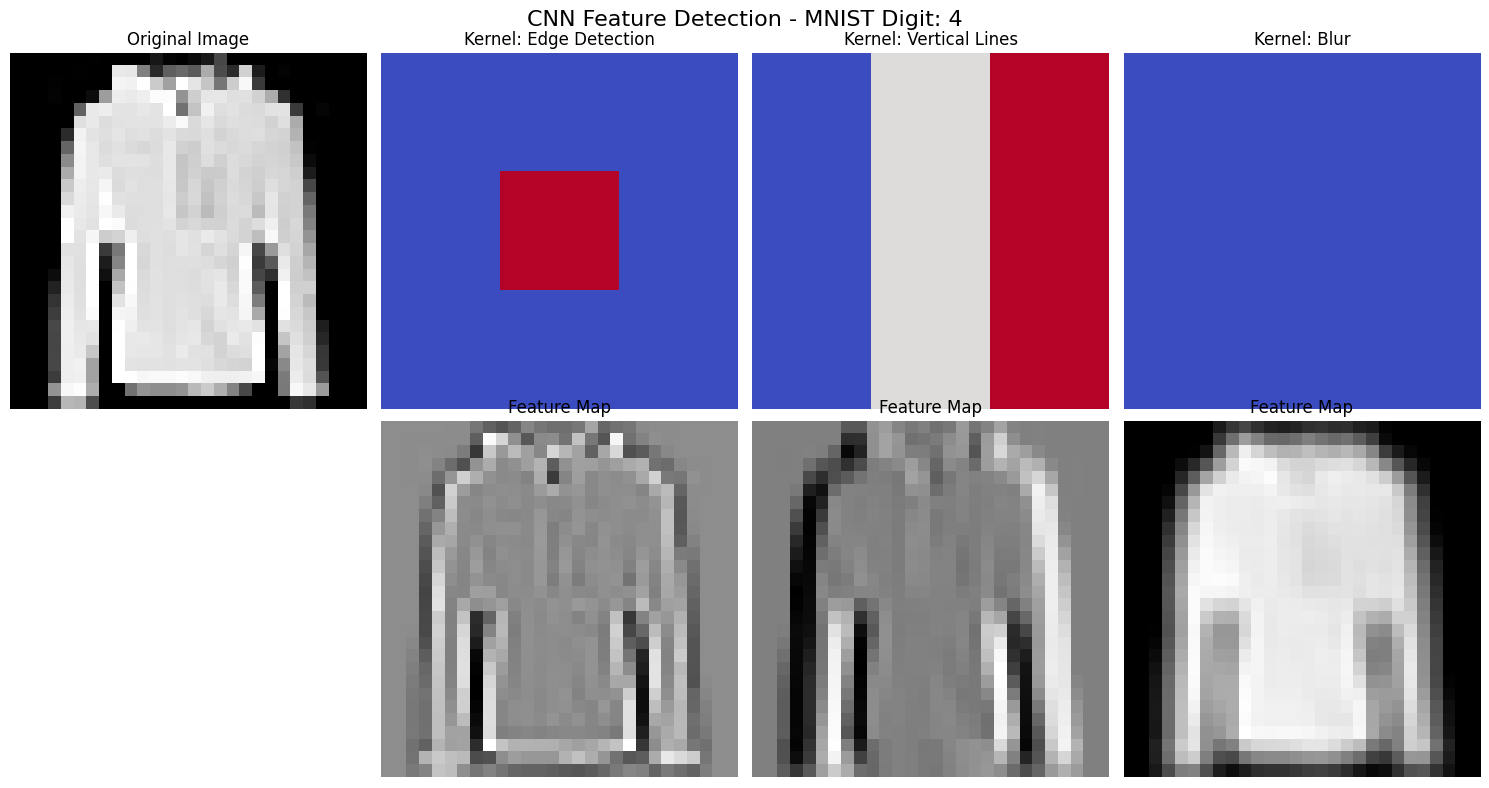

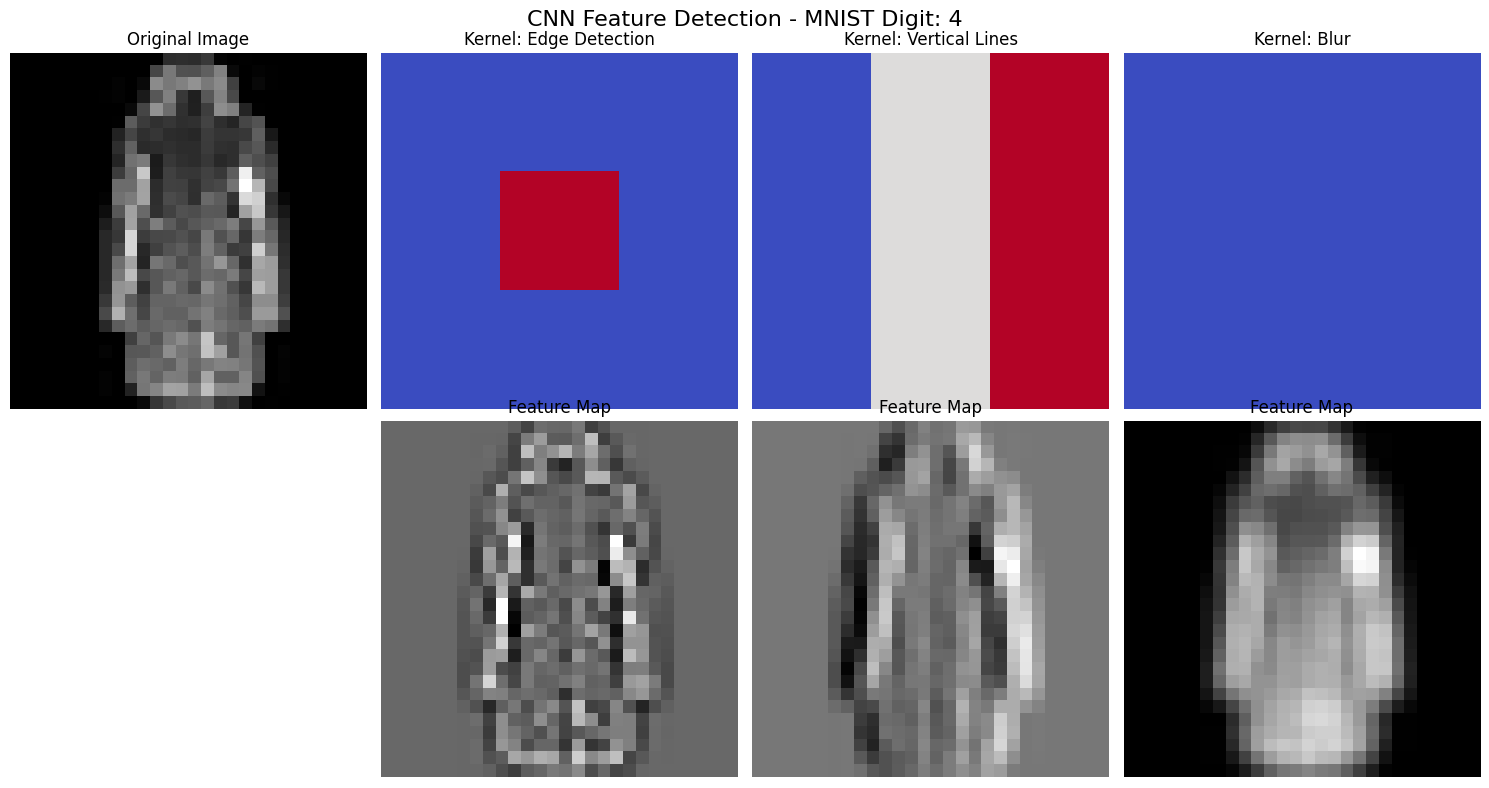

In [21]:
num_examples = 5
while num_examples > 0:
    show_feature_maps()
    time.sleep(2)
    num_examples -= 1

In [22]:
# Build a CNN model for classification
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Vaidurya Samaga\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7436 - loss: 0.7010 - val_accuracy: 0.8624 - val_loss: 0.3764
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8791 - loss: 0.3290 - val_accuracy: 0.8878 - val_loss: 0.3111
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8992 - loss: 0.2729 - val_accuracy: 0.8913 - val_loss: 0.2952
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9101 - loss: 0.2443 - val_accuracy: 0.8997 - val_loss: 0.2745
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9212 - loss: 0.2155 - val_accuracy: 0.9058 - val_loss: 0.2599
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9270 - loss: 0.1932 - val_accuracy: 0.9099 - val_loss: 0.2511
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9353 - loss: 0.1739 - val_accuracy: 0.9136 - val_loss: 0.2397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9397 - loss: 

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9114 - loss: 0.2840
Test accuracy: 0.9110999703407288
